In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Các tham số đầu vào
v_K_range = np.linspace(0, 30, 50)  # Khoảng tốc độ của v_K (m/s)
v_M_range = np.linspace(0, 30, 50)    # Khoảng tốc độ của v_M (m/s)
a_M_range = np.arange(2, 3, 0.2)    # Khoảng của a_M từ 2 đến 3 với bước nhảy 0.2

# Các tham số cố định
t0 = 15
c_v = 0.05
c_a = 0.3
w = 3.5
tj = 1.8
theta = np.deg2rad(3)  # Chuyển đổi 3 độ sang radian
a_K_values = [-1, 0, 1]  # Các giá trị khác nhau của a_TL như trong hình ảnh


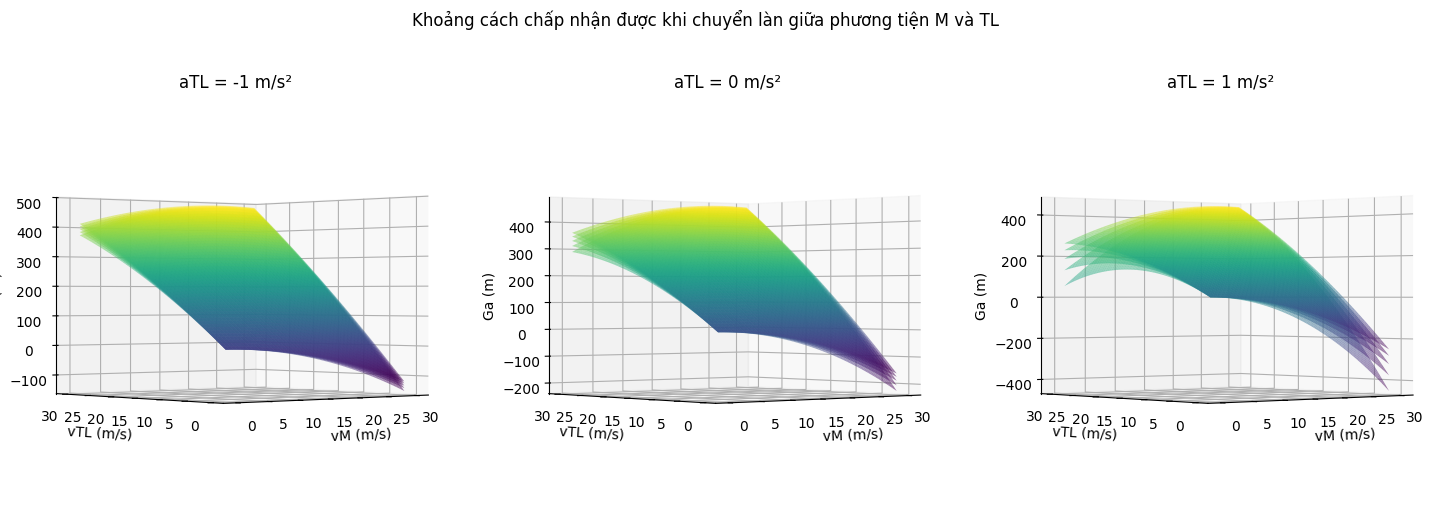

In [6]:

# Chuẩn bị hình vẽ
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
fig.suptitle("Khoảng cách chấp nhận được khi chuyển làn giữa phương tiện M và TL")

for idx, a_TL in enumerate(a_K_values):
    ax = axes[idx]
    
    # Tạo lưới cho v_TL và v_M, nhưng hoán đổi trục x và y
    v_M, v_TL = np.meshgrid(v_M_range, v_K_range)
    
    # Vòng lặp qua từng giá trị a_M
    for a_M in a_M_range:
        # Tính G_min cho từng giá trị a_M và a_TL
        G_min = (t0 - c_v * (v_TL - v_M) - c_a * (a_TL - a_M)) * v_M

        # Tính G_a^M-TL cho từng giá trị a_M
        G_a_M_TL = -((v_TL - v_M)**2 / (2 * (a_M - a_TL))) + G_min + w * np.sin(theta)
        # Lọc các giá trị mà v_M >= v_TF
        # mask = v_M < v_TL
        # G_a_M_TL_masked = np.where(mask, G_a_M_TL, np.nan)  # Đặt các giá trị ngoài phạm vi thành NaN
        # Vẽ mặt phẳng
        ax.plot_surface(v_TL, v_M, G_a_M_TL, alpha=0.5, rstride=1, cstride=1, cmap='viridis')
    
    # Đặt nhãn và tiêu đề
    ax.set_xlabel("vM (m/s)")
    ax.set_ylabel("vTL (m/s)")
    ax.set_zlabel("Ga (m)")
    ax.set_title(f"aTL = {a_TL} m/s²")
    ax.view_init(elev=0, azim=-130)

plt.show()


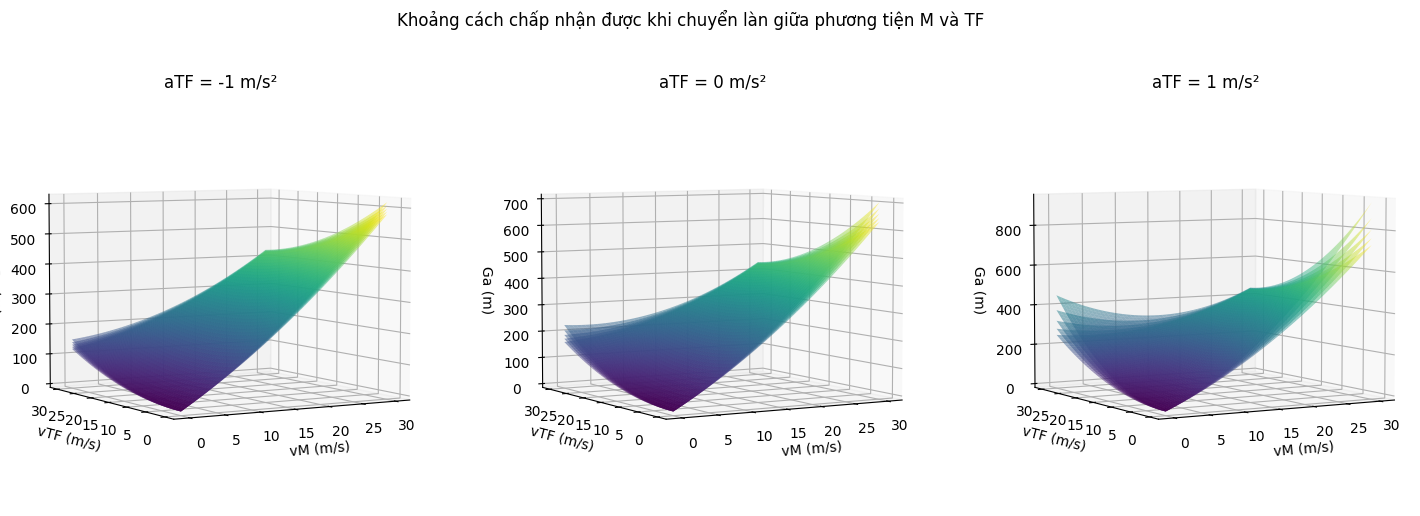

In [7]:

# Chuẩn bị hình vẽ
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
fig.suptitle("Khoảng cách chấp nhận được khi chuyển làn giữa phương tiện M và TF")

for idx, a_TF in enumerate(a_K_values):
    ax = axes[idx]
    
    # Tạo lưới cho v_M và v_TF, nhưng hoán đổi trục x và y
    v_M, v_TF = np.meshgrid(v_M_range, v_K_range)
    
    # Vòng lặp qua từng giá trị a_M
    for a_M in a_M_range:
        # Tính G_min cho từng giá trị a_M và a_TF
        G_min = (t0 - c_v * (v_M - v_TF) - c_a * (a_M - a_TF)) * v_TF
        
        # Tính G_a^M-TF cho từng giá trị a_M
        G_a_M_TF = ((v_TF - v_M)**2 / (2 * (a_M - a_TF))) + G_min + w * np.sin(theta)

        # Lọc các giá trị mà v_M >= v_TF
        # mask = v_M < v_TF
        # G_a_M_TF_masked = np.where(mask, G_a_M_TF, np.nan)  # Đặt các giá trị ngoài phạm vi thành NaN
        
        # Vẽ mặt phẳng


        
        ax.plot_surface(v_TF,v_M , G_a_M_TF, alpha=0.5, rstride=1, cstride=1, cmap='viridis')
    
    # Đặt nhãn và tiêu đề
    ax.set_xlabel("vM (m/s)")
    ax.set_ylabel("vTF (m/s)")
    ax.set_zlabel("Ga (m)")
    ax.set_title(f"aTF = {a_TF} m/s²")
    ax.view_init(elev=5, azim=-120)

plt.show()

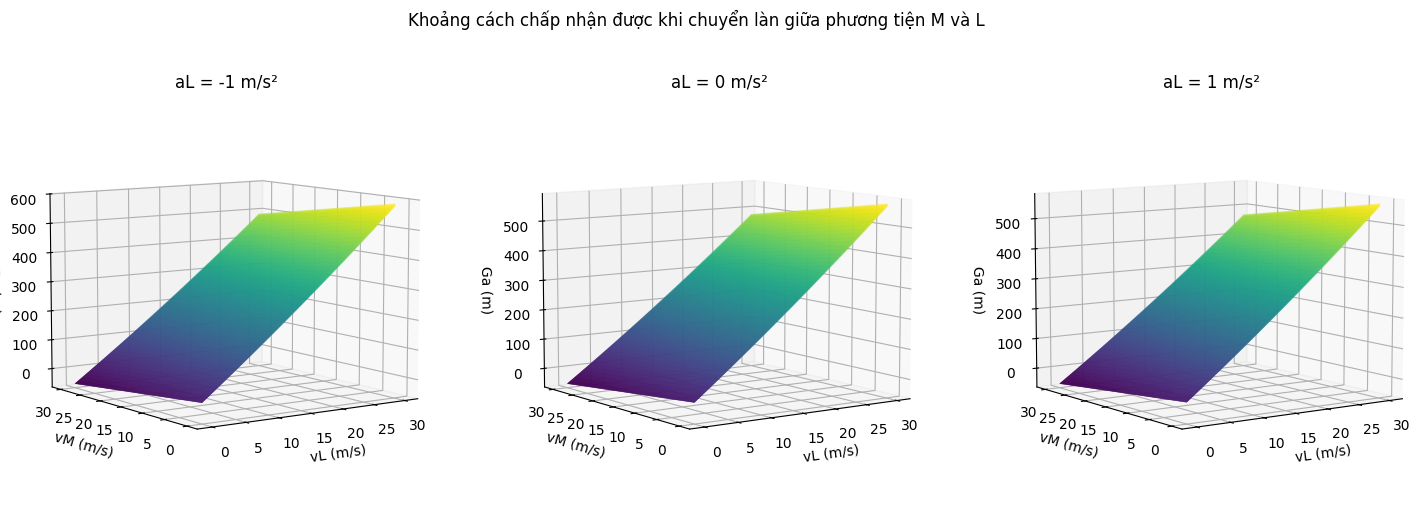

In [8]:

# Chuẩn bị hình vẽ
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
fig.suptitle("Khoảng cách chấp nhận được khi chuyển làn giữa phương tiện M và L")

for idx, a_L in enumerate(a_K_values):
    ax = axes[idx]
    
    # Tạo lưới cho v_M và v_TF, nhưng hoán đổi trục x và y
    v_M, v_L = np.meshgrid(v_M_range, v_K_range)
    
    # Vòng lặp qua từng giá trị a_M
    for a_M in a_M_range:
        # Tính G_min cho từng giá trị a_M và a_TF
        G_min = (t0 - c_v * (v_L - v_M) - c_a * (a_L - a_M)) * v_M
        
        # Tính G_a^M-TF cho từng giá trị a_M
        G_a_M_L = (v_M - v_L)*tj + a_M * (tj**2) / 2 + G_min + w * np.sin(theta)

        # Lọc các giá trị mà v_M >= v_TF
        # mask = v_M > v_L
        # G_a_M_L_masked = np.where(mask, G_a_M_L, np.nan)  # Đặt các giá trị ngoài phạm vi thành NaN
        
        # Vẽ mặt phẳng
        ax.plot_surface(v_M, v_L , G_a_M_L, alpha=0.5, rstride=1, cstride=1, cmap='viridis')
    
    # Đặt nhãn và tiêu đề
    ax.set_xlabel("vL (m/s)")
    ax.set_ylabel("vM (m/s)")
    ax.set_zlabel("Ga (m)")
    ax.set_title(f"aL = {a_L} m/s²")
    ax.view_init(elev=8, azim=-125)

plt.show()